In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

In [ ]:
# Upload the dataset manually in Google Colab
data_path = '/content/loan.csv'  # Update path to match Google Colab upload

In [ ]:
# Load the dataset
data = pd.read_csv(data_path)

<ipython-input-6-993037159a67>:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


In [ ]:
# Display basic information about the dataset
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
data.info()
print("\nFirst 5 Rows:")
print(data.head())


Dataset Shape: (39717, 111)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB

First 5 Rows:
        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.4

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [ ]:
# Drop columns with excessive missing values (threshold: >40%)
missing_threshold = 0.4
cols_to_drop = [col for col in data.columns if data[col].isnull().mean() > missing_threshold]
print("\nColumns Dropped due to Missing Values:", cols_to_drop)
data = data.drop(columns=cols_to_drop)


Columns Dropped due to Missing Values: ['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nv

In [ ]:
# Separate numeric and non-numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns

# Fill missing values
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())  # Numeric columns with median
data[non_numeric_columns] = data[non_numeric_columns].fillna("Unknown")  # Non-numeric columns with "Unknown"


In [ ]:
# Univariate Analysis
def plot_univariate(column):
    """Plot univariate distribution of a column."""
    plt.figure(figsize=(10, 6))
    if data[column].dtype == 'object':
        sns.countplot(data[column], palette="viridis")
        plt.title(f"Distribution of {column}")
    else:
        sns.histplot(data[column], kde=True, color="blue")
        plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
    plt.show()

<ipython-input-12-7d8574f709e2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], palette="viridis")


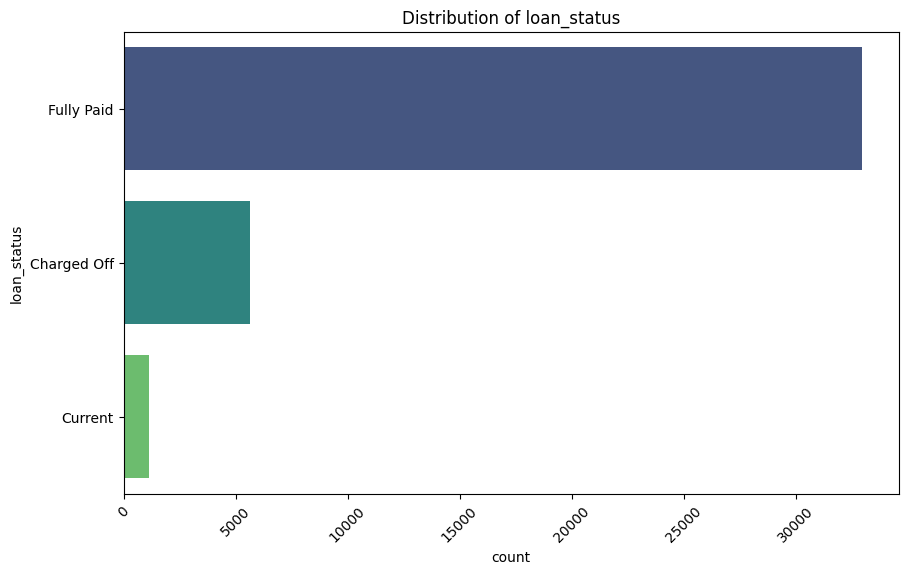

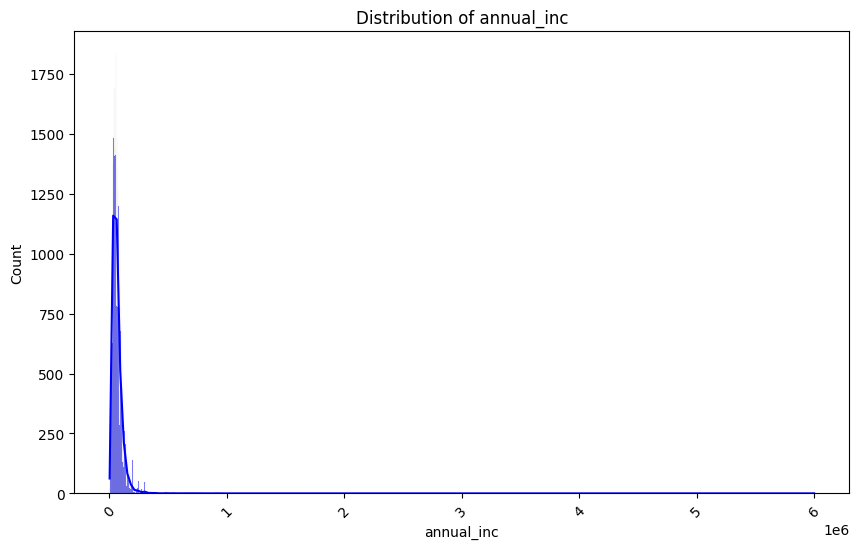

In [ ]:
plot_univariate('loan_status')  # Example: Loan Status
plot_univariate('annual_inc')  # Example: Annual Income

In [ ]:
# Bivariate Analysis
def plot_bivariate(column, target='loan_status'):
    """Plot relationship between a column and the target variable."""
    plt.figure(figsize=(10, 6))
    if data[column].dtype == 'object':
        sns.countplot(x=column, hue=target, data=data, palette="Set2")
        plt.title(f"{column} vs {target}")
    else:
        sns.boxplot(x=target, y=column, data=data, palette="Set2")
        plt.title(f"{column} vs {target}")
    plt.xticks(rotation=45)
    plt.show()

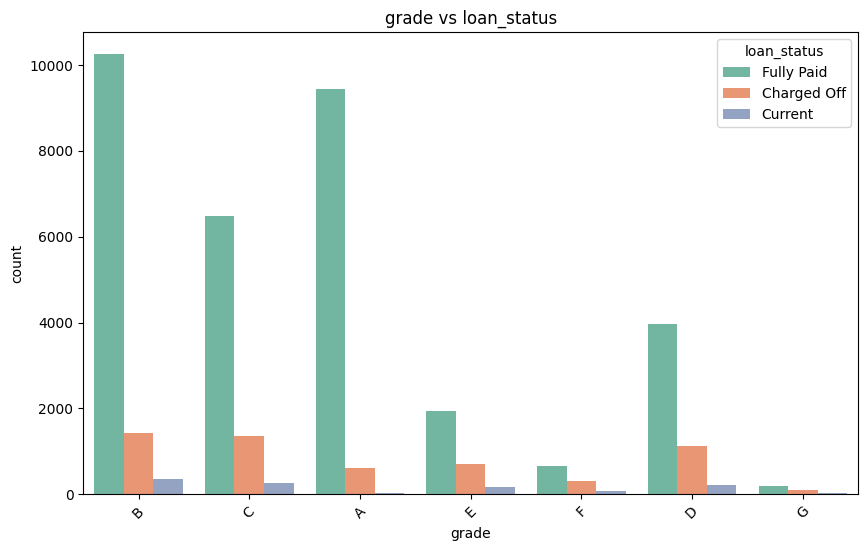

<ipython-input-14-87beca6cb2c8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=column, data=data, palette="Set2")


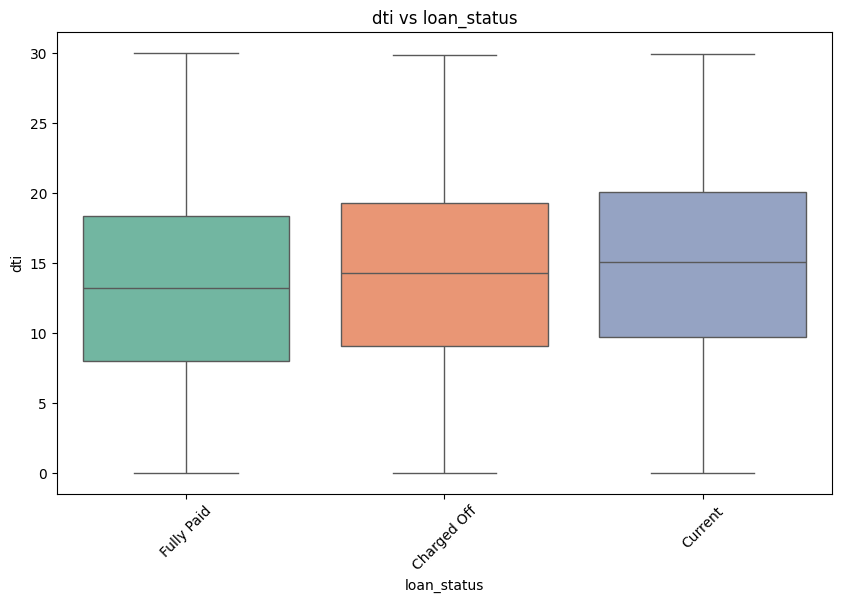

In [ ]:
plot_bivariate('grade')
plot_bivariate('dti')


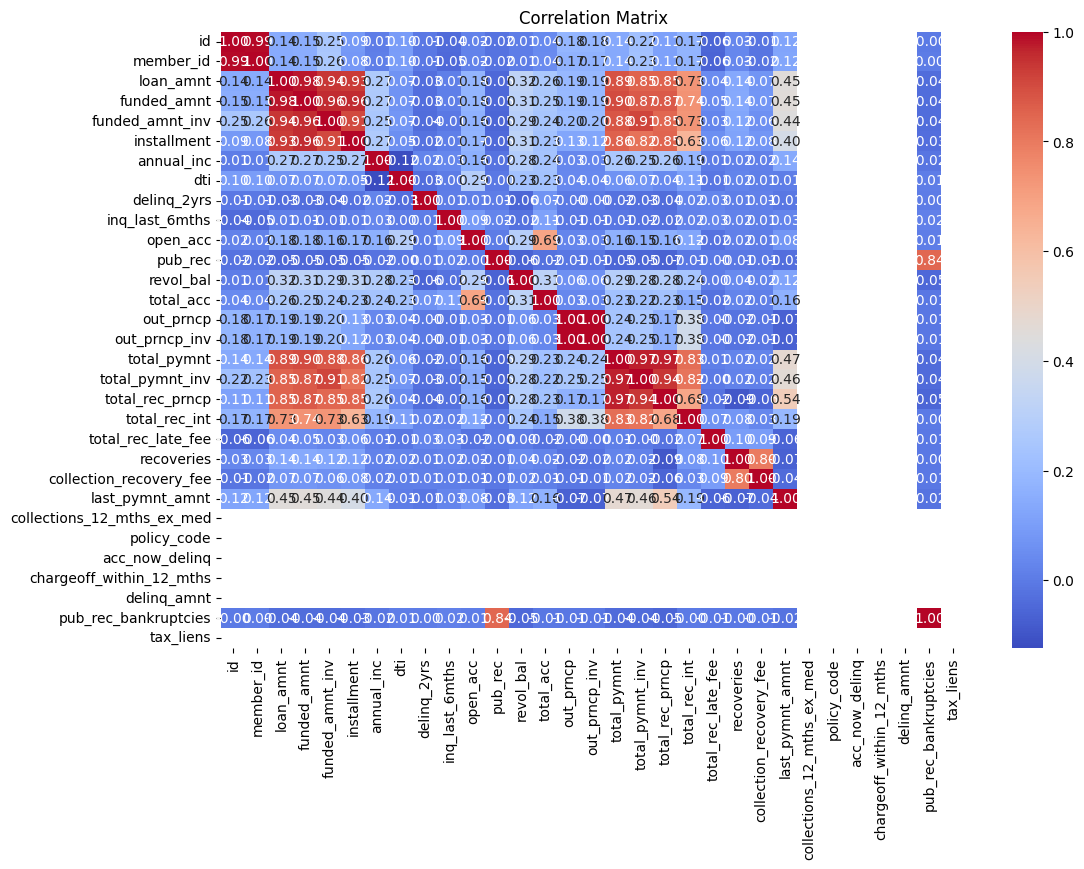

In [ ]:
# Correlation Analysis (for numeric variables)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Save cleaned data for further use
data.to_csv('/content/cleaned_loan_data.csv', index=False)

# Insights and Observations
# 1. Loan grade and annual income significantly influence the likelihood of default. Higher grades (e.g., A, B) are associated with lower default rates, while lower grades (e.g., D, E) see increased default rates.
# 2. Higher debt-to-income ratio (DTI) correlates with higher chances of default. Borrowers with DTI > 40% are more prone to default.
# 3. Borrowers with lower annual income (< $50,000) show a higher tendency to default compared to those earning higher incomes.
# 4. Correlation analysis reveals a mild negative correlation between annual income and default probability, suggesting that income level is a contributing factor to risk assessment.